<a href="https://colab.research.google.com/github/samueleallen/Valorant-Match-Predictor-w-Scraper-/blob/main/ValorantMatchPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd

## Step 1: Cleaning/Prepping data for Machine Learning
Task List:
 * Aggregate player data to one row for each team  
 * Convert column types appropriately (e.g., object type to float for R2.0 feature)
 * Investigate missing data

In [162]:
matches_df = pd.read_csv("overall_game_stats.csv")
matches_df.head()

,Player,R2.0,ACS,K,D,A,+/- K/D,KAST,ADR,HS%,FK,FD,+/- FK/FD,date,Team,vs Team,result,final_score
0,jawgemo,1.18,243.0,103,89,44,14,78%,160.0,28%,12.0,20.0,-8.0,3/2/2025,G2 Esports,T1,Loss,'2 : 3'
1,trent,1.11,224.0,92,79,40,13,75%,145.0,29%,14.0,9.0,5.0,3/2/2025,G2 Esports,T1,Loss,'2 : 3'
2,valyn,1.02,210.0,94,82,51,12,77%,138.0,25%,10.0,10.0,0.0,3/2/2025,G2 Esports,T1,Loss,'2 : 3'
3,leaf,0.81,190.0,79,86,31,-7,75%,119.0,21%,13.0,15.0,-2.0,3/2/2025,G2 Esports,T1,Loss,'2 : 3'
4,JonahP,0.92,162.0,74,87,42,-13,75%,105.0,28%,7.0,11.0,-4.0,3/2/2025,G2 Esports,T1,Loss,'2 : 3'


In [163]:
# Define which columns should be aggregated using the mean
numeric_columns = ['R2.0', 'ACS', 'K', 'D', 'A', '+/- K/D', 'KAST', 'ADR', 'HS%', 'FK', 'FD', '+/- FK/FD']

# Convert date column from object to datetime
matches_df["date"] = pd.to_datetime(matches_df["date"])

# Convert percentage columns to numeric values (remove "%" and convert to float)
matches_df["KAST"] = matches_df["KAST"].str.rstrip('%').astype(float)
matches_df["HS%"] = matches_df["HS%"].str.rstrip('%').astype(float)

# Group each team match into one row
matches_df = matches_df.groupby(['date', 'Team', 'vs Team', 'result', 'final_score']).agg({col: 'mean' for col in numeric_columns}).reset_index()
matches_df.sort_values(by='date')
# Save to CSV file
# matches_df.to_csv('aggregated_matches.csv', index=False)
matches_df.head()


,date,Team,vs Team,result,final_score,R2.0,ACS,K,D,A,+/- K/D,KAST,ADR,HS%,FK,FD,+/- FK/FD
0,2023-02-13,DetonatioN FocusMe,Giants Gaming,Loss,'0 : 2',0.768333,166.5,17.333333,24.833333,6.833333,-7.5,60.0,107.333333,33.0,2.5,3.666667,-1.166667
1,2023-02-13,Giants Gaming,DetonatioN FocusMe,Win,'2 : 0',1.248000,218.0,29.800000,20.800000,11.000000,9.0,83.6,148.800000,30.4,4.4,3.000000,1.400000
2,2023-02-13,KOI,NRG Esports,Loss,'0 : 2',1.034000,170.6,27.000000,30.400000,12.600000,-3.4,68.0,113.000000,25.6,3.2,6.000000,-2.800000
3,2023-02-13,NRG Esports,KOI,Win,'2 : 0',1.198000,196.4,30.400000,27.000000,13.800000,3.4,77.2,126.800000,24.0,6.0,3.200000,2.800000
4,2023-02-14,BBL Esports,DRX,Loss,'1 : 2',0.876000,175.8,37.600000,45.800000,15.200000,-8.2,67.2,117.000000,28.4,5.2,6.800000,-1.600000


In [164]:
matches_df.shape

(1536, 17)

In [165]:
matches_df.dtypes

date           datetime64[ns]
Team                   object
vs Team                object
result                 object
final_score            object
R2.0                  float64
ACS                   float64
K                     float64
D                     float64
A                     float64
+/- K/D               float64
KAST                  float64
ADR                   float64
HS%                   float64
FK                    float64
FD                    float64
+/- FK/FD             float64
dtype: object

In [166]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Handle missing values
matches_df.fillna(0, inplace=True)

# Convert percentage columns like 'HS%' and 'KAST' to numeric
matches_df['HS%'] = pd.to_numeric(matches_df['HS%'], errors='coerce')  # Convert to numeric, handle errors by coercing to NaN
matches_df['KAST'] = pd.to_numeric(matches_df['KAST'], errors='coerce')

# Encode categorical columns like 'Player', 'Team', 'vs Team'
label_encoder = LabelEncoder()

# Convert 'final_score' to two separate columns for individual scores
matches_df[['final_score_winner', 'final_score_loser']] = matches_df['final_score'].str.split(':', expand=True)

# Convert the split columns to numeric
matches_df['final_score_winner'] = pd.to_numeric(matches_df['final_score_winner'], errors='coerce')
matches_df['final_score_loser'] = pd.to_numeric(matches_df['final_score_loser'], errors='coerce')

# Drop 'final_score' column as it is now split into 'final_score_winner' and 'final_score_loser'
matches_df.drop(columns=['final_score'], inplace=True)

# Convert 'result' to integers (0 for Loss, 1 for Win)
matches_df['result'] = matches_df['result'].replace({'Loss': 0, 'Win': 1})

# Check the result
matches_df.dtypes

C:\Users\Sam\AppData\Local\Temp\ipykernel_2272\3903825537.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matches_df['result'] = matches_df['result'].replace({'Loss': 0, 'Win': 1})


date                  datetime64[ns]
Team                          object
vs Team                       object
result                         int64
R2.0                         float64
ACS                          float64
K                            float64
D                            float64
A                            float64
+/- K/D                      float64
KAST                         float64
ADR                          float64
HS%                          float64
FK                           float64
FD                           float64
+/- FK/FD                    float64
final_score_winner           float64
final_score_loser            float64
dtype: object

### Data Aggregation
Currently, we stil have each match represented as two unique rows.
 * We have one row for each team in the match
 * This leads to two predictions for the same match...

To fix this, we will aggregate the data even further, essentially doubling our attributes per row but removing every other row. This will create new columns containing the stats of the 'vs Team'.

In [167]:
import numpy as np

# Convert date-time column to string format for future concatenation
matches_df['date_str'] = matches_df['date'].dt.strftime('%Y-%m-%d')

# Define Team 1 as alphabetically first name and Team 2 as alhpabetically last name
matches_df['Team_1'] = np.minimum(matches_df['Team'], matches_df['vs Team'])
matches_df['Team_2'] = np.maximum(matches_df['Team'], matches_df['vs Team'])

# Create unique match_ID for each match
matches_df['Match_ID'] = matches_df['date_str'] + '_' + matches_df['Team_1'] + '/' + matches_df['Team_2']

# Identify columns we want to keep
stats_cols = ['R2.0', 'ACS', 'K', 'D', 'A', '+/- K/D', 'KAST', 'ADR', 'HS%', 'FK', 'FD', '+/- FK/FD']

# Separate and rename team 1's stats
df_t1 = matches_df[matches_df['Team'] == matches_df['Team_1'].copy()]
# Create Team 1's Win/Loss target variable
df_t1['T1_Won'] = np.where(df_t1['result'] == 1, 1, 0)
df_t1 = df_t1[['Match_ID', 'date_str', 'Team', 'T1_Won'] + stats_cols]
df_t1.columns = ['Match_ID', 'date_str', 'Team', 'T1_Won'] + [col + '_T1' for col in stats_cols]

# Separate and rename team 2's stats
df_t2 = matches_df[matches_df['vs Team'] == matches_df['Team_2'].copy()]
# Create Team 2's Win/Loss target variable
df_t2 = df_t2[['Match_ID', 'vs Team'] + stats_cols]
df_t2.columns = ['Match_ID', 'vs Team'] + [col + '_T2' for col in stats_cols]

# Finally, merge both dataframes
final_df = df_t1.merge(df_t2, on='Match_ID', how='inner')

final_df.to_csv("aggregated_game_stats.csv")


C:\Users\Sam\AppData\Local\Temp\ipykernel_2272\2969623976.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t1['T1_Won'] = np.where(df_t1['result'] == 1, 1, 0)


In [168]:
# Print results to verify that it is correctly aggregated (Verified)
final_df.head()

,Match_ID,date_str,Team,T1_Won,R2.0_T1,ACS_T1,K_T1,D_T1,A_T1,+/- K/D_T1,...,K_T2,D_T2,A_T2,+/- K/D_T2,KAST_T2,ADR_T2,HS%_T2,FK_T2,FD_T2,+/- FK/FD_T2
0,2023-02-13_DetonatioN FocusMe/Giants Gaming,2023-02-13,DetonatioN FocusMe,0,0.768333,166.5,17.333333,24.833333,6.833333,-7.5,...,17.333333,24.833333,6.833333,-7.5,60.0,107.333333,33.0,2.5,3.666667,-1.166667
1,2023-02-13_KOI/NRG Esports,2023-02-13,KOI,0,1.034000,170.6,27.000000,30.400000,12.600000,-3.4,...,27.000000,30.400000,12.600000,-3.4,68.0,113.000000,25.6,3.2,6.000000,-2.800000
2,2023-02-14_BBL Esports/DRX,2023-02-14,BBL Esports,0,0.876000,175.8,37.600000,45.800000,15.200000,-8.2,...,37.600000,45.800000,15.200000,-8.2,67.2,117.000000,28.4,5.2,6.800000,-1.600000
3,2023-02-14_Cloud9/Paper Rex,2023-02-14,Cloud9,1,1.358000,231.8,31.600000,22.000000,16.600000,9.6,...,31.600000,22.000000,16.600000,9.6,86.2,148.200000,24.0,4.4,3.200000,1.200000
4,2023-02-14_FunPlus Phoenix/Karmine Corp,2023-02-14,FunPlus Phoenix,0,0.894000,185.0,38.000000,44.000000,17.200000,-6.0,...,38.000000,44.000000,17.200000,-6.0,71.2,119.600000,27.6,3.6,8.200000,-4.600000


## Step 2: Creating Initial Machine Learning Model

### 1. Creating Predictors for Machine Learning
 * Select relevant pre-match features
 * Calculate past performance stats (e.g., rolling averages)
 * Ensure no data leakage from test set

### 2. Creating Initial Machine Learning model
 * Split data into training and test sets
 * Initialize machine learning model
 * Train the model using `train` data

In [169]:
from sklearn.ensemble import RandomForestClassifier
# maybe experiment with these values
rf = RandomForestClassifier(n_estimators=50, min_samples_split = 10, random_state = 1)

In [170]:
# Filter the dataset based on date
final_df['date'] = pd.to_datetime(final_df['date_str'])

train = final_df[matches_df["date"] < '2025-02-19'].copy()
test = final_df[matches_df["date"] >= '2025-02-19'].copy()

# Convert 'date' column to numeric (days since the first date)
train['date'] = (train['date'] - train['date'].min()).dt.days
test['date'] = (test['date'] - test['date'].min()).dt.days

C:\Users\Sam\AppData\Local\Temp\ipykernel_2272\1453277371.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train = final_df[matches_df["date"] < '2025-02-19'].copy()
C:\Users\Sam\AppData\Local\Temp\ipykernel_2272\1453277371.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = final_df[matches_df["date"] >= '2025-02-19'].copy()


In [171]:
unorganized_predictors = ['K', 'D', 'A', '+/- K/D', 'ADR', 'HS%', 'FK', 'FD', 'KAST']

predictors = [pred + '_T1' for pred in unorganized_predictors] + [pred + '_T2' for pred in unorganized_predictors]

In [172]:
print(test[predictors].dtypes)


K_T1          float64
D_T1          float64
A_T1          float64
+/- K/D_T1    float64
ADR_T1        float64
HS%_T1        float64
FK_T1         float64
FD_T1         float64
KAST_T1       float64
K_T2          float64
D_T2          float64
A_T2          float64
+/- K/D_T2    float64
ADR_T2        float64
HS%_T2        float64
FK_T2         float64
FD_T2         float64
KAST_T2       float64
dtype: object


## Betting Model
For this model, the test set will include historical performances of teams rather than the actual match data from the match the model is trying to predict.  
  
A couple of ways to do this:   
 * Rolling averages
 * Cumulative average

First we will look at implementing rolling averages in our test set

In [173]:
grouped_matches = final_df.groupby("Team")

In [174]:
# Each team has a unique integer ID rather than a string for team name
group = grouped_matches.get_group("G2 Esports").sort_values("date")

In [175]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")  # Sort group data by date
    numeric_cols = group[cols].select_dtypes(include=['number'])  # Select numeric columns, ignore dates
    rolling_stats = numeric_cols.rolling(3, closed='left').mean()  # Compute rolling average
    # Assign the rolling stats back to the group, ensuring the new columns are added correctly
    for i, col in enumerate(rolling_stats.columns):
        group[new_cols[i]] = rolling_stats[col]
    # group = group.dropna(subset=new_cols)  # Drop rows with NaN in the new columns
    # group = group.drop(['T1_Won'], axis = 1)
    return group

In [176]:
cols = predictors
new_cols = [f"{c}_rolling" for c in cols]

In [177]:
new_cols

['K_T1_rolling',
 'D_T1_rolling',
 'A_T1_rolling',
 '+/- K/D_T1_rolling',
 'ADR_T1_rolling',
 'HS%_T1_rolling',
 'FK_T1_rolling',
 'FD_T1_rolling',
 'KAST_T1_rolling',
 'K_T2_rolling',
 'D_T2_rolling',
 'A_T2_rolling',
 '+/- K/D_T2_rolling',
 'ADR_T2_rolling',
 'HS%_T2_rolling',
 'FK_T2_rolling',
 'FD_T2_rolling',
 'KAST_T2_rolling']

In [178]:
rolling_averages(group, cols, new_cols)

,Match_ID,date_str,Team,T1_Won,R2.0_T1,ACS_T1,K_T1,D_T1,A_T1,+/- K/D_T1,...,KAST_T1_rolling,K_T2_rolling,D_T2_rolling,A_T2_rolling,+/- K/D_T2_rolling,ADR_T2_rolling,HS%_T2_rolling,FK_T2_rolling,FD_T2_rolling,KAST_T2_rolling
271,2024-02-18_G2 Esports/KRÜ Esports,2024-02-18,G2 Esports,1,1.104,203.0,47.4,45.8,19.2,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2024-02-25_G2 Esports/KRÜ Esports,2024-02-25,G2 Esports,1,1.290,211.8,31.0,26.0,15.8,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2024-02-26_G2 Esports/MIBR,2024-02-26,G2 Esports,0,0.892,190.0,48.2,52.6,15.8,-4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,2024-02-26_G2 Esports/Sentinels,2024-02-26,G2 Esports,1,0.848,195.0,45.0,44.0,17.6,1.0,...,73.533333,42.200000,41.466667,16.933333,0.733333,134.866667,28.866667,5.800000,6.400000,73.533333
434,2024-04-24_G2 Esports/LEVIATÁN,2024-04-24,G2 Esports,0,0.812,181.8,38.6,45.8,10.8,-7.2,...,73.533333,41.400000,40.866667,16.400000,0.533333,132.933333,28.533333,6.200000,5.800000,73.533333
447,2024-04-27_G2 Esports/MIBR,2024-04-27,G2 Esports,1,1.180,225.2,30.8,24.2,11.2,6.6,...,68.866667,43.933333,47.466667,14.733333,-3.533333,125.333333,29.800000,6.466667,6.866667,68.866667
479,2024-05-05_G2 Esports/LOUD,2024-05-05,G2 Esports,0,0.794,166.6,22.8,30.2,11.0,-7.4,...,71.400000,38.133333,38.000000,13.200000,0.133333,134.000000,28.800000,5.200000,5.800000,71.400000
493,2024-05-09_G2 Esports/KRÜ Esports,2024-05-09,G2 Esports,1,1.080,223.2,31.8,23.6,14.8,8.2,...,69.266667,30.733333,33.400000,11.000000,-2.666667,129.533333,27.466667,3.866667,5.533333,69.266667
502,2024-05-11_G2 Esports/LEVIATÁN,2024-05-11,G2 Esports,1,0.878,200.2,84.0,85.6,35.4,-1.6,...,73.800000,28.466667,26.000000,12.333333,2.466667,139.066667,26.800000,3.733333,4.133333,73.800000
509,2024-05-23_G2 Esports/T1,2024-05-23,G2 Esports,1,0.000,191.0,42.2,45.4,15.8,-3.2,...,71.866667,46.200000,46.466667,20.400000,-0.266667,131.800000,26.200000,6.600000,6.666667,71.866667


In [179]:
matches_rolling = final_df.groupby("Team").apply(lambda x: rolling_averages(x, cols, new_cols))

C:\Users\Sam\AppData\Local\Temp\ipykernel_2272\1711042726.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = final_df.groupby("Team").apply(lambda x: rolling_averages(x, cols, new_cols))


In [180]:
matches_rolling

Match_ID  \
Team                                                                   
100 Thieves        17           2023-02-23_100 Thieves/EDward Gaming   
                   24             2023-02-26_100 Thieves/FUT Esports   
                   26                  2023-02-27_100 Thieves/FNATIC   
                   46               2023-04-01_100 Thieves/Sentinels   
                   69           2023-04-10_100 Thieves/Evil Geniuses   
...                                                              ...   
Titan Esports Club 330   2024-02-27_Titan Esports Club/Trace Esports   
                   363  2024-04-05_Titan Esports Club/Wolves Esports   
                   613   2024-07-06_Titan Esports Club/Trace Esports   
Trace Esports      413       2024-04-19_Trace Esports/Wolves Esports   
Wolves Esports     665       2025-01-11_Wolves Esports/Xi Lai Gaming   

                          date_str                Team  T1_Won  R2.0_T1  \
Team                                                                      
100 Thieves        17   2023-02-23         100 Thieves       1    1.142   
                   24   2023-02-26         100 Thieves       1    1.146   
                   26   2023-02-27         100 Thieves       0    0.574   
                   46   2023-04-01         100 Thieves       0    0.848   
                   69   2023-04-10         100 Thieves       1    1.220   
...                            ...                 ...     ...      ...   
Titan Esports Club 330  2024-02-27  Titan Esports Club       0    0.000   
                   363  2024-04-05  Titan Esports Club       1    0.000   
                   613  2024-07-06  Titan Esports Club       0    0.000   
Trace Esports      413  2024-04-19       Trace Esports       1    0.000   
Wolves Esports     665  2025-01-11      Wolves Esports       0    0.000   

                        ACS_T1  K_T1  D_T1  A_T1  +/- K/D_T1  ...  \
Team                                                          ...   
100 Thieves        17    203.0  50.6  50.4  22.2         0.2  ...   
                   24    216.2  50.4  47.0  28.4         3.4  ...   
                   26    167.6  21.6  31.8   7.4       -10.2  ...   
                   46    185.4  48.8  56.0  23.6        -7.2  ...   
                   69    224.0  32.2  23.6  14.4         8.6  ...   
...                        ...   ...   ...   ...         ...  ...   
Titan Esports Club 330   191.2  49.2  56.8  22.0        -7.6  ...   
                   363   200.4  47.6  46.6  21.2         1.0  ...   
                   613   206.0  49.6  49.0  21.0         0.6  ...   
Trace Esports      413   215.8  33.4  28.2  15.0         5.2  ...   
Wolves Esports     665   188.4  29.0  34.4  13.2        -5.4  ...   

                        KAST_T1_rolling  K_T2_rolling  D_T2_rolling  \
Team                                                                  
100 Thieves        17               NaN           NaN           NaN   
                   24               NaN           NaN           NaN   
                   26               NaN           NaN           NaN   
                   46         70.533333     40.866667     43.066667   
                   69         70.133333     40.266667     44.933333   
...                                 ...           ...           ...   
Titan Esports Club 330              NaN           NaN           NaN   
                   363              NaN           NaN           NaN   
                   613              NaN           NaN           NaN   
Trace Esports      413              NaN           NaN           NaN   
Wolves Esports     665              NaN           NaN           NaN   

                        A_T2_rolling  +/- K/D_T2_rolling  ADR_T2_rolling  \
Team                                                                       
100 Thieves        17            NaN                 NaN             NaN   
                   24            NaN                 NaN             NaN   
                   26

In [181]:
matches_rolling = matches_rolling.droplevel('Team')

In [182]:
matches_rolling

,Match_ID,date_str,Team,T1_Won,R2.0_T1,ACS_T1,K_T1,D_T1,A_T1,+/- K/D_T1,...,KAST_T1_rolling,K_T2_rolling,D_T2_rolling,A_T2_rolling,+/- K/D_T2_rolling,ADR_T2_rolling,HS%_T2_rolling,FK_T2_rolling,FD_T2_rolling,KAST_T2_rolling
17,2023-02-23_100 Thieves/EDward Gaming,2023-02-23,100 Thieves,1,1.142,203.0,50.6,50.4,22.2,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2023-02-26_100 Thieves/FUT Esports,2023-02-26,100 Thieves,1,1.146,216.2,50.4,47.0,28.4,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2023-02-27_100 Thieves/FNATIC,2023-02-27,100 Thieves,0,0.574,167.6,21.6,31.8,7.4,-10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2023-04-01_100 Thieves/Sentinels,2023-04-01,100 Thieves,0,0.848,185.4,48.8,56.0,23.6,-7.2,...,70.533333,40.866667,43.066667,19.333333,-2.200000,132.000000,26.133333,5.133333,6.533333,70.533333
69,2023-04-10_100 Thieves/Evil Geniuses,2023-04-10,100 Thieves,1,1.220,224.0,32.2,23.6,14.4,8.6,...,70.133333,40.266667,44.933333,19.800000,-4.666667,126.466667,24.866667,6.333333,5.666667,70.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2024-02-27_Titan Esports Club/Trace Esports,2024-02-27,Titan Esports Club,0,0.000,191.2,49.2,56.8,22.0,-7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,2024-04-05_Titan Esports Club/Wolves Esports,2024-04-05,Titan Esports Club,1,0.000,200.4,47.6,46.6,21.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,2024-07-06_Titan Esports Club/Trace Esports,2024-07-06,Titan Esports Club,0,0.000,206.0,49.6,49.0,21.0,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,2024-04-19_Trace Esports/Wolves Esports,2024-04-19,Trace Esports,1,0.000,215.8,33.4,28.2,15.0,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
matches_rolling.index = range(matches_rolling.shape[0])

In [184]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

def make_predictions(data, predictors):
  train = data[data["date"] < '2025-02-19']
  test = data[data["date"] >= '2025-02-19']
  rf.fit(train[predictors], train["T1_Won"])
  preds = rf.predict(test[predictors])
  combined = pd.DataFrame(dict(actual=test["T1_Won"], predicted=preds), index=test.index)
  precision = precision_score(test["T1_Won"], preds)
  acc = accuracy_score(test["T1_Won"], preds)
  return combined, precision, acc

In [185]:
print(matches_rolling.columns)

Index(['Match_ID', 'date_str', 'Team', 'T1_Won', 'R2.0_T1', 'ACS_T1', 'K_T1',
       'D_T1', 'A_T1', '+/- K/D_T1', 'KAST_T1', 'ADR_T1', 'HS%_T1', 'FK_T1',
       'FD_T1', '+/- FK/FD_T1', 'vs Team', 'R2.0_T2', 'ACS_T2', 'K_T2', 'D_T2',
       'A_T2', '+/- K/D_T2', 'KAST_T2', 'ADR_T2', 'HS%_T2', 'FK_T2', 'FD_T2',
       '+/- FK/FD_T2', 'date', 'K_T1_rolling', 'D_T1_rolling', 'A_T1_rolling',
       '+/- K/D_T1_rolling', 'ADR_T1_rolling', 'HS%_T1_rolling',
       'FK_T1_rolling', 'FD_T1_rolling', 'KAST_T1_rolling', 'K_T2_rolling',
       'D_T2_rolling', 'A_T2_rolling', '+/- K/D_T2_rolling', 'ADR_T2_rolling',
       'HS%_T2_rolling', 'FK_T2_rolling', 'FD_T2_rolling', 'KAST_T2_rolling'],
      dtype='object')


In [186]:
print(predictors + new_cols)

['K_T1', 'D_T1', 'A_T1', '+/- K/D_T1', 'ADR_T1', 'HS%_T1', 'FK_T1', 'FD_T1', 'KAST_T1', 'K_T2', 'D_T2', 'A_T2', '+/- K/D_T2', 'ADR_T2', 'HS%_T2', 'FK_T2', 'FD_T2', 'KAST_T2', 'K_T1_rolling', 'D_T1_rolling', 'A_T1_rolling', '+/- K/D_T1_rolling', 'ADR_T1_rolling', 'HS%_T1_rolling', 'FK_T1_rolling', 'FD_T1_rolling', 'KAST_T1_rolling', 'K_T2_rolling', 'D_T2_rolling', 'A_T2_rolling', '+/- K/D_T2_rolling', 'ADR_T2_rolling', 'HS%_T2_rolling', 'FK_T2_rolling', 'FD_T2_rolling', 'KAST_T2_rolling']


In [187]:
new_rolling_predictors = [col for col in new_cols]
combined, precision, acc = make_predictions(matches_rolling, new_rolling_predictors)

In [188]:
precision

0.6

In [189]:
acc

0.5625

In [190]:
matches_rolling

,Match_ID,date_str,Team,T1_Won,R2.0_T1,ACS_T1,K_T1,D_T1,A_T1,+/- K/D_T1,...,KAST_T1_rolling,K_T2_rolling,D_T2_rolling,A_T2_rolling,+/- K/D_T2_rolling,ADR_T2_rolling,HS%_T2_rolling,FK_T2_rolling,FD_T2_rolling,KAST_T2_rolling
0,2023-02-23_100 Thieves/EDward Gaming,2023-02-23,100 Thieves,1,1.142,203.0,50.6,50.4,22.2,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-26_100 Thieves/FUT Esports,2023-02-26,100 Thieves,1,1.146,216.2,50.4,47.0,28.4,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-27_100 Thieves/FNATIC,2023-02-27,100 Thieves,0,0.574,167.6,21.6,31.8,7.4,-10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-01_100 Thieves/Sentinels,2023-04-01,100 Thieves,0,0.848,185.4,48.8,56.0,23.6,-7.2,...,70.533333,40.866667,43.066667,19.333333,-2.200000,132.000000,26.133333,5.133333,6.533333,70.533333
4,2023-04-10_100 Thieves/Evil Geniuses,2023-04-10,100 Thieves,1,1.220,224.0,32.2,23.6,14.4,8.6,...,70.133333,40.266667,44.933333,19.800000,-4.666667,126.466667,24.866667,6.333333,5.666667,70.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2024-02-27_Titan Esports Club/Trace Esports,2024-02-27,Titan Esports Club,0,0.000,191.2,49.2,56.8,22.0,-7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,2024-04-05_Titan Esports Club/Wolves Esports,2024-04-05,Titan Esports Club,1,0.000,200.4,47.6,46.6,21.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,2024-07-06_Titan Esports Club/Trace Esports,2024-07-06,Titan Esports Club,0,0.000,206.0,49.6,49.0,21.0,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,2024-04-19_Trace Esports/Wolves Esports,2024-04-19,Trace Esports,1,0.000,215.8,33.4,28.2,15.0,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
combined = combined.merge(matches_rolling[["Team", "vs Team", "date"]], right_index=True, left_index=True)

In [192]:
combined.head(10)

,actual,predicted,Team,vs Team,date
204,1,1,DRX,Sentinels,2025-02-20
205,0,1,DRX,Team Vitality,2025-02-22
206,0,0,DRX,T1,2025-02-24
284,1,1,EDward Gaming,Team Liquid,2025-02-20
285,1,0,EDward Gaming,G2 Esports,2025-02-22
286,1,0,EDward Gaming,T1,2025-02-27
287,0,1,EDward Gaming,G2 Esports,2025-02-28
288,0,0,EDward Gaming,T1,2025-03-01
460,1,1,G2 Esports,Trace Esports,2025-02-21
461,1,1,G2 Esports,Team Liquid,2025-02-24


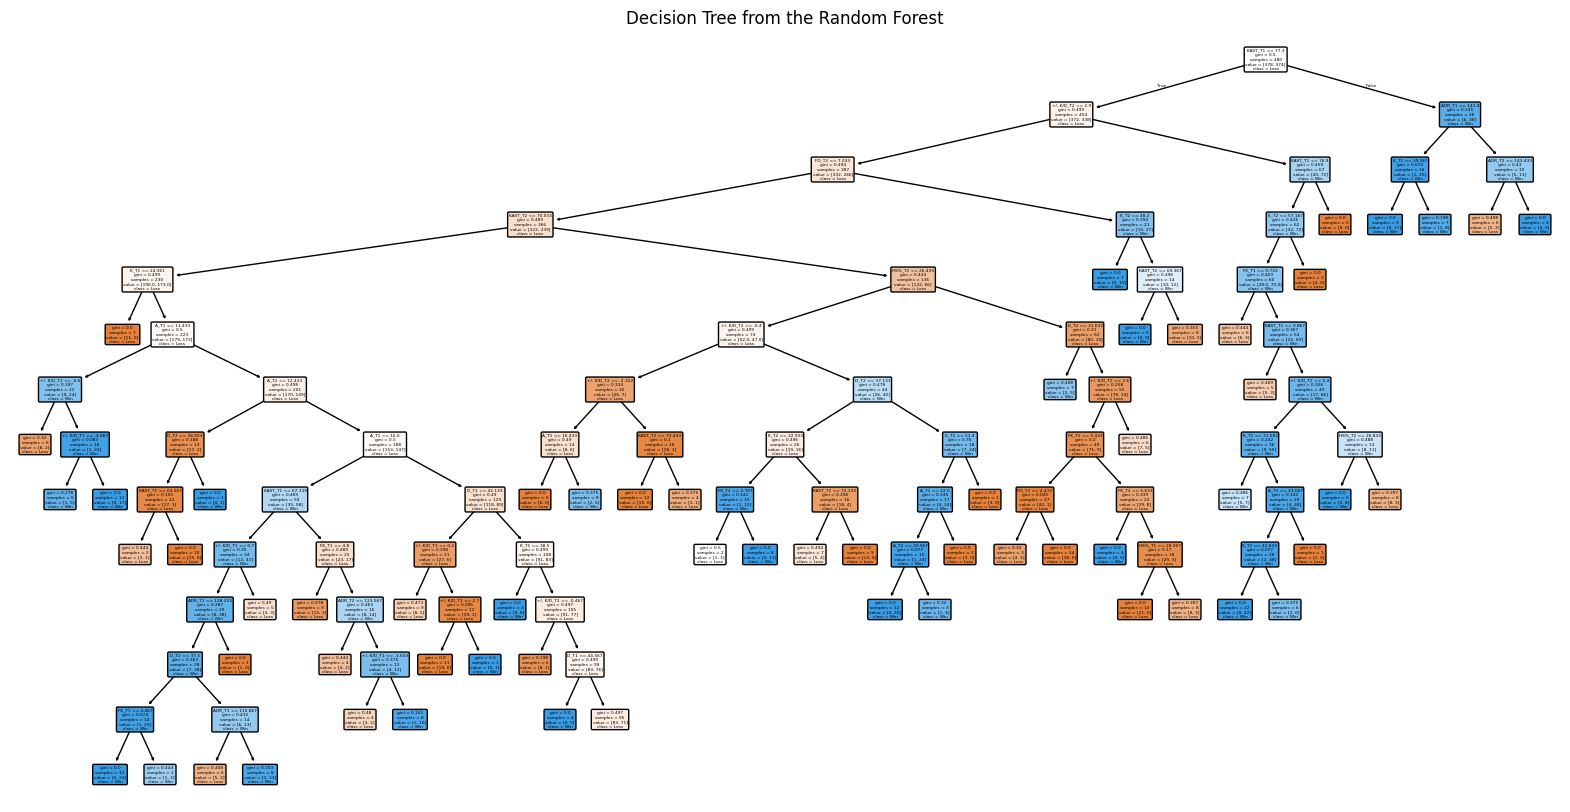

In [193]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the tree using the plot_tree function from sklearn (This is for randomforest only)
tree = rf.estimators_[0]
plt.figure(figsize=(20,10))  # Set figure size to make the tree more readable
plot_tree(tree,
          feature_names=predictors, # Use the feature names from the dataset
          class_names=['Loss', 'Win'], # Class names for the target variable
          filled=True, # Fill nodes with colors for better visualization
          rounded=True) # Rounded edges for nodes
plt.title("Decision Tree from the Random Forest")
plt.show()

## Betting Accuracy
When the model is fed rolling averages of teams, it boasts an accuracy of 56% with randomForest Classifier

Future Improvements:
 * ~~Try XGBoost~~
    * XGBoost performed worse by roughly 3% accuracy
 * Research other statistical methods
 * Find more features to implement (e.g., time of match, jetlag, team elo)